In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler 
from scipy import stats 
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px 
import plotly.graph_objects as go
import plotly.express as px 




In [3]:
df1 = pd.read_csv('/content/Shark Tank India.csv')

In [4]:
print(df1['Season Number'].max(), "Season \n")
print(df1['Episode Number'].max(), "Episode \n")
print(df1['Pitch Number'].max(), "Startup companies pitching \n")
print(df1['Episode Number'].value_counts().sort_values(ascending = True).unique())

1 Season 

36 Episode 

121 Startup companies pitching 

[3 4]


In [7]:
df1.head()

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,...,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,...,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,...,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,https://thehnh.in/,4,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(df1['Industry'].value_counts())

tmp = df1['Industry'].value_counts().sort_values(ascending = True)
fig = px.bar(tmp, x ='Industry', title =' Different industries in Shark Tank',
color = 'Industry' , template = 'simple_white', text = tmp)
fig.show()

Food                   37
Beauty/Fashion         22
Manufacturing          17
Technology             11
Education               8
Services                7
Medical                 7
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Name: Industry, dtype: int64


Gender Wise Entreprenuers

In [54]:
print("Total pitchers-", int(df1['Number of Presenters'].sum()),'\n',)

print("Total male pitchers-", int(df1['Male Presenters'].sum()),'\n')

print("Total female pitchers-", int(df1['Female Presenters'].sum()),'\n',)

print('Male entreprenuers percentage-', round(df1['Male Presenters'].sum()/df1
['Number of Presenters'].sum()*100,2), '%\n', sep='')

print('Female entreprenuers percentage-', round(df1['Female Presenters'].sum()/df1
['Number of Presenters'].sum()*100,2), '%\n', sep='')

print('Couple entreprenuers percentage-', round(df1['Couple Presenters'].sum()/df1
['Number of Presenters'].sum()*100,2), '%\n', sep='')

Total pitchers- 252 

Total male pitchers- 177 

Total female pitchers- 75 

Male entreprenuers percentage-70.24%

Female entreprenuers percentage-29.76%

Couple entreprenuers percentage-9.92%



Top 10 Highest Yearly Revenue of the brands 

In [9]:
print(df1.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))

tmpdf = df1.sort_values('Yearly Revenue', ascending = False)[0:10]
fig = px.bar(tmpdf, x = "Startup Name", y= 'Yearly Revenue', color = 'Startup Name',
             title = "Highest Revenue of the pitches", text = tmpdf['Yearly Revenue'].map(int).map(str)+ '%')

fig.show()

Startup Name
French Crown          7200.0
Guardian Gears        2500.0
Raising Superstars    1300.0
PlayBoxTV             1020.0
Alpino                1000.0
Hammer Lifestyle      1000.0
Shades of Spring       900.0
Tagz Foods             700.0
Devnagri               500.0
Moonshine              372.0
Name: Yearly Revenue, dtype: float64


Top 10 highest Gross Margin of different brands 

In [10]:
print(df1.groupby('Startup Name')['Gross Margin'].max().nlargest(10))

tmpdf = df1.sort_values('Gross Margin', ascending = False)[0:10]
fig = px.bar(tmpdf, x= 'Startup Name', y= 'Gross Margin', color = "Startup Name",
             title = "Highrst Gross Margin of the brands", text = tmpdf['Gross Margin'].map(int).map(str) + '%')

fig.show()

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
Auli                   80.0
Cos IQ                 75.0
Thea and Sid           75.0
Bummer                 70.0
French Crown           70.0
Moonshine              70.0
Nomad Food Project     70.0
Name: Gross Margin, dtype: float64


How many accepted or rejected shark offers?

1    73%
0    27%
Name: Received Offer, dtype: object 



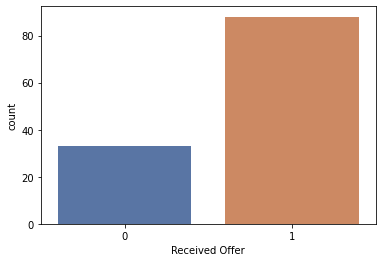

In [11]:
print(round(df1['Received Offer'].value_counts(normalize = True)*100).astype(str).str.replace('.0','%'),'\n')
sns.countplot(x = 'Received Offer', data = df1, palette ='deep')

73% vcompanies accepted the offer while the remaining 27% could not convince the sharks to make an offer 

1.0    76%
0.0    24%
Name: Accepted Offer, dtype: object /n


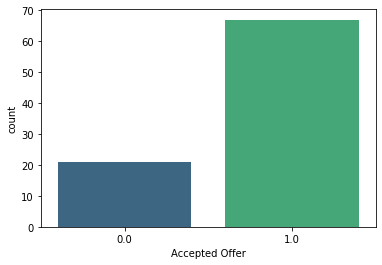

In [12]:
print(round(df1['Accepted Offer'].value_counts(normalize = True)*100).astype(str).str.replace('.0','%'),"/n")
sns.countplot(x='Accepted Offer', data = df1, palette ="viridis")

Start up companies who rejected sharks offer 

In [13]:
df1.loc[df1['Accepted Offer']==0, ["Startup Name", "Original Ask Amount", "Original Ask Equity", "Valuation Requested",
                                   "Valuation Offered"]]

,Startup Name,Original Ask Amount,Original Ask Equity,Valuation Requested,Valuation Offered
6,qZense Labs,100.0,0.25,40000,NaN
19,Torch-it,75.0,1.00,7500,NaN
20,La Kheer Deli,50.0,7.50,667,NaN
26,Kabira Handmad,100.0,5.00,2000,NaN
40,Morriko Pure Foods,100.0,3.00,3333,NaN
54,India Hemp and Co,50.0,4.00,1250,NaN
59,Keto India,150.0,1.25,12000,NaN
69,Moonshine,80.0,0.50,16000,NaN
70,Falhari,50.0,2.00,2500,NaN
72,Urban Monkey,100.0,1.00,10000,NaN


Industry wise Investments By different sharks 

Food                   8
Electrical Vehicles    3
Education              3
Manufacturing          2
Beauty/Fashion         2
Animal/Pets            1
Sports                 1
Technology             1
Name: Industry, dtype: int64


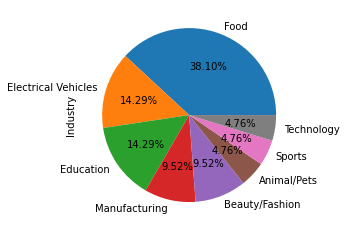

In [14]:
print(df1[df1['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values (ascending=False))
df1[df1['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending = False).plot.pie(autopct='%1.2f%%')
plt.show()

Number of Sharks in a deal 


1.0    33%
2.0    31%
3.0    22%
4.0     7%
5.0     6%
Name: Number of sharks in deal, dtype: object
The deals where more than or equal of 5 sharks ae involved
             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


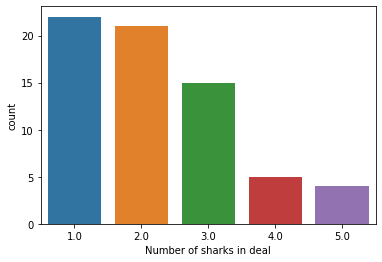

In [15]:
print(round(df1['Number of sharks in deal'].value_counts(normalize= True)*100).astype(str).str.replace('.0','%'))
sns.countplot(data = df1, x = 'Number of sharks in deal')
print('The deals where more than or equal of 5 sharks ae involved')
print(df1.loc[df1['Number of sharks in deal']>=5][["Startup Name", "Total Deal Amount", "Total Deal Equity"]])

In [16]:
print(format_currency(df1['Total Deal Amount'].sum()/100,'USD',locale = 'en_IN').replace('.00',''),'crores')

$39.03 crores


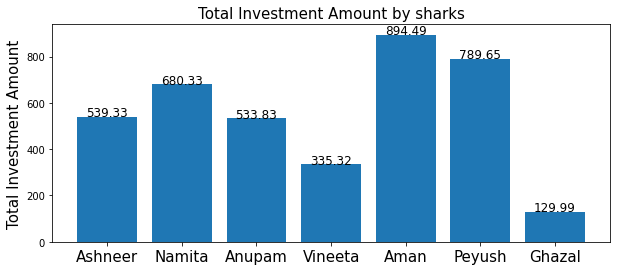

In [34]:
Amount = [df1['Ashneer Investment Amount'].sum(), df1['Namita Investment Amount'].sum(), df1['Anupam Investment Amount'].sum(),df1['Vineeta Investment Amount'].sum(),
          df1['Aman Investment Amount'].sum(), df1['Peyush Investment Amount'].sum(),df1['Ghazal Investment Amount'].sum()]
name = ['Ashneer','Namita','Anupam', 'Vineeta', 'Aman','Peyush','Ghazal']
df = {'Name':name, 'Total Amount': Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount", fontsize = 15)
for index, d in enumerate(Amount):
  plt.text(x=index, y= d+2, s=f"{round(d,2)}", ha = 'center', fontdict = dict(fontsize =12))
plt.title("Total Investment Amount by sharks", fontsize = 15)
plt.show()

         


In [35]:
print(format_currency(df1['Total Deal Debt'].sum()/100,'USD',locale = 'en_IN').replace('.00',''),'crores')

$3.51 crores


Total Equity Received By Sharks 

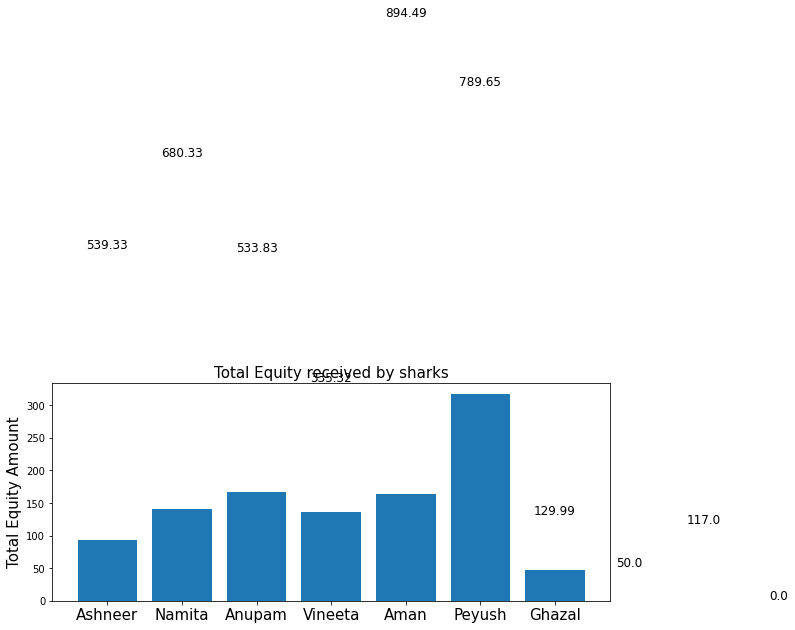

In [41]:
Equity = [df1['Ashneer Investment Equity'].sum(), df1['Namita Investment Equity'].sum(), df1['Anupam Investment Equity'].sum(), df1['Vineeta Investment Equity'].sum(),
          df1['Aman Investment Equity'].sum(), df1['Peyush Investment Equity'].sum(),
          df1['Ghazal Investment Equity'].sum()]
df = {'Name': name, 'Total Equity': Equity}
plt.figure(figsize =(10,4))
plt.bar(df['Name'], df['Total Equity'])
plt.xticks(fontsize=15)
plt.ylabel("Total Equity Amount", fontsize = 15)
for index, d in enumerate(Amount):
  plt.text(x=index, y= d+2, s=f"{round(d,2)}", ha = 'center', fontdict = dict(fontsize =12))
plt.title("Total Equity received by sharks", fontsize = 15)
plt.show()

Companies who got the same valuation as they requested 

Some Comanies were on pre revenue or didnt had any revenue 

In [50]:
df2 = df1.loc[df1['Yearly Revenue']==0]
print(df2['Startup Name'])

23        Motion Breeze
41      Good Good Piggy
82     Julaa Automation
97             Scholify
99           Sabjikothi
113             On2Cook
Name: Startup Name, dtype: object
